In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv("Customer churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Replacing The blanks in Total Charges with zero as Tenure is 0 and no total Charges are recorded. Changing datatype from object to float.

In [18]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")

In [20]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [36]:
df["customerID"].duplicated().sum()

np.int64(0)

##### Converting the senior citizen column from (0,1) to ("No","Yes") for better readability.

In [88]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [89]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


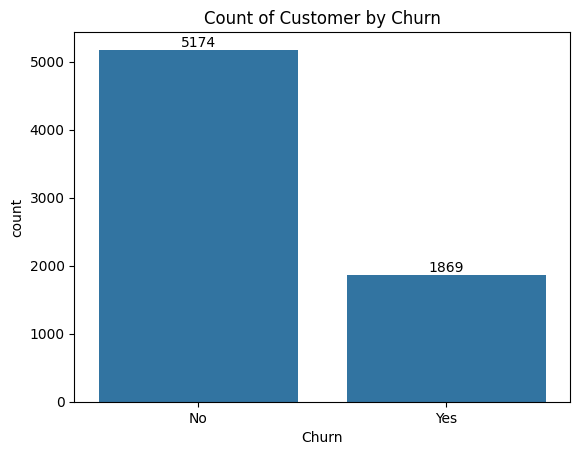

In [63]:
ax = sns.countplot(data = df , x = df['Churn'])
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

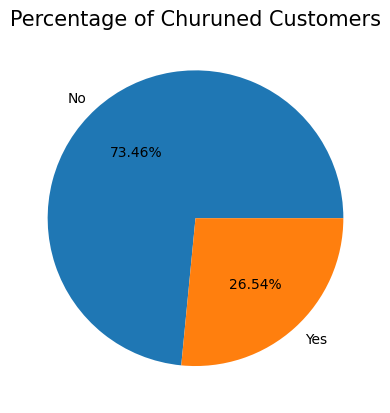

In [90]:
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index , autopct = "%.2f%%")
plt.title("Percentage of Churuned Customers" , fontsize = 15)
plt.show()

In [68]:
# From the given pie chart we can conclude that 26.54% of the customers have been churned out.

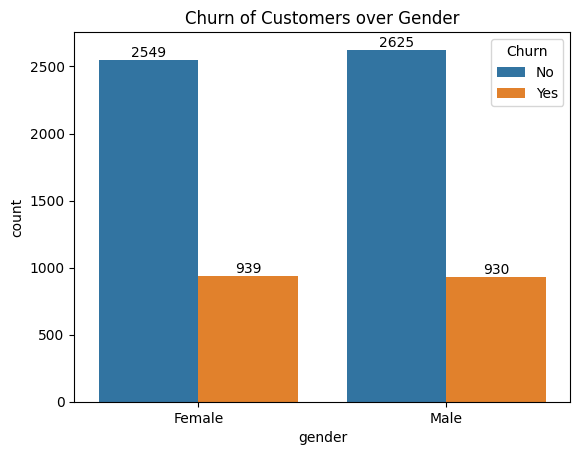

In [85]:
ax = sns.countplot(x = "gender",data = df,hue ="Churn" )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn of Customers over Gender")
plt.show()

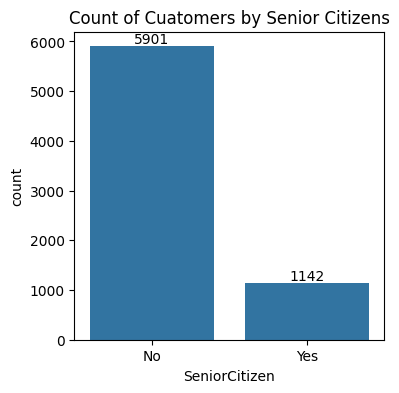

In [132]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="SeniorCitizen",data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Cuatomers by Senior Citizens")
plt.show()

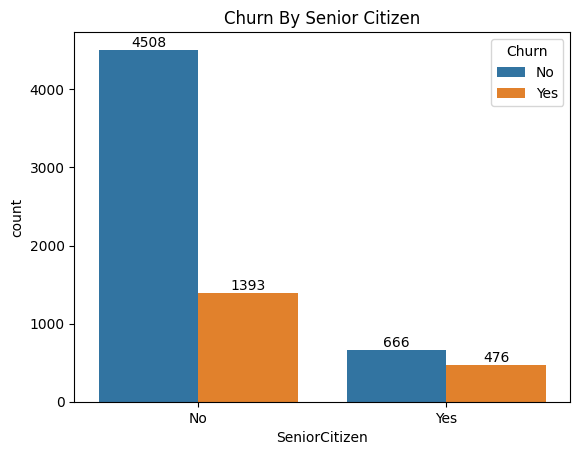

In [91]:
ax = sns.countplot(x= "SeniorCitizen",data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn By Senior Citizen")
plt.show()

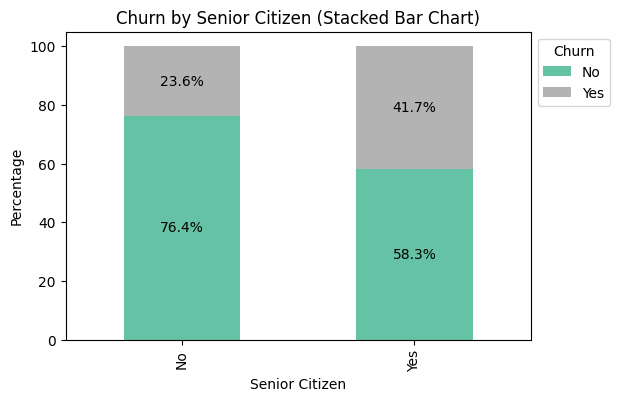

In [294]:
total_count = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert to percentages of total per SeniorCitizen
total_count_perc = total_count.div(total_count.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar chart
ax = total_count_perc.plot(kind='bar', stacked=True, figsize=(6,4), colormap="Set2")

# Step 4: Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.title("Churn by Senior Citizen (Stacked Bar Chart)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title="Churn",bbox_to_anchor = (1,1)) # bboc_to_anchor is used to keep the legend outside the chart.
plt.show()


In [134]:
#Comparatively a greater percentage of people in senior citizen category have churned. 

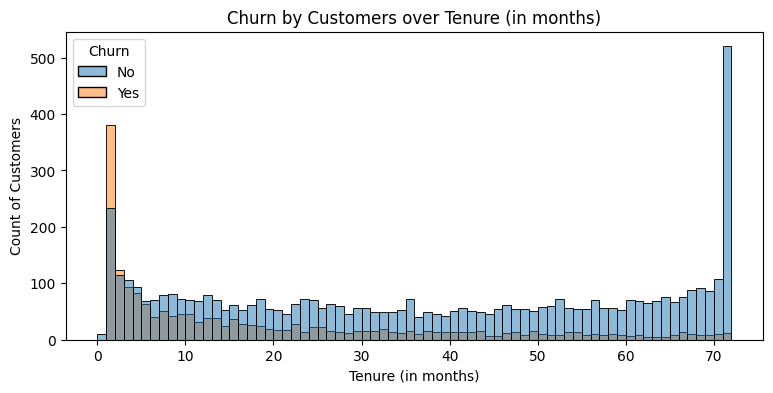

In [194]:
plt.figure(figsize=(9,4))
sns.histplot(x= "tenure",data =df,bins = 72,hue = "Churn" )

plt.title("Churn by Customers over Tenure (in months)")
plt.ylabel("Count of Customers")
plt.xlabel("Tenure (in months)")
plt.show()

In [185]:
#People who have used our services for a long time have stayed and people who have used our servies "1 or 2 months" have churned.

In [151]:
count = df['Churn'].value_counts()
count

Churn
No     5174
Yes    1869
Name: count, dtype: int64

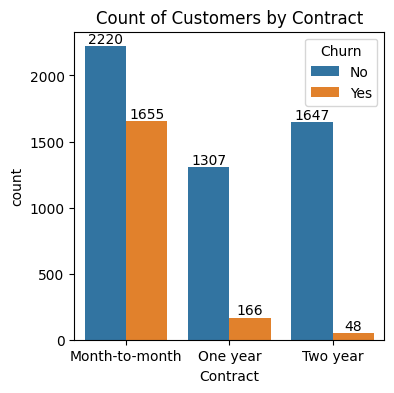

In [241]:
plt.figure(figsize=(4,4))
ax = sns.countplot(data = df, x = "Contract",hue = "Churn")
ax.bar_label(ax.containers[0]),ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Contract")
plt.show()

In [250]:
# People who have month-to-month are likely to churn then from those who have 1 or 2 years of contract.

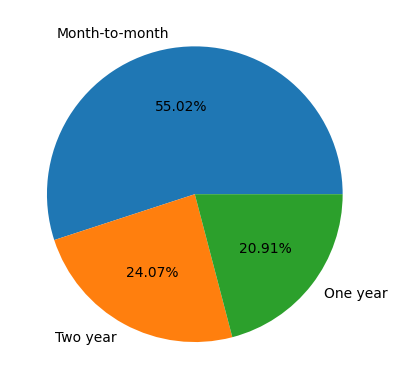

In [249]:
counts = df['Contract'].value_counts()

plt.pie(counts,labels = counts.index , autopct= "%.2f%%")
plt.show()

In [254]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

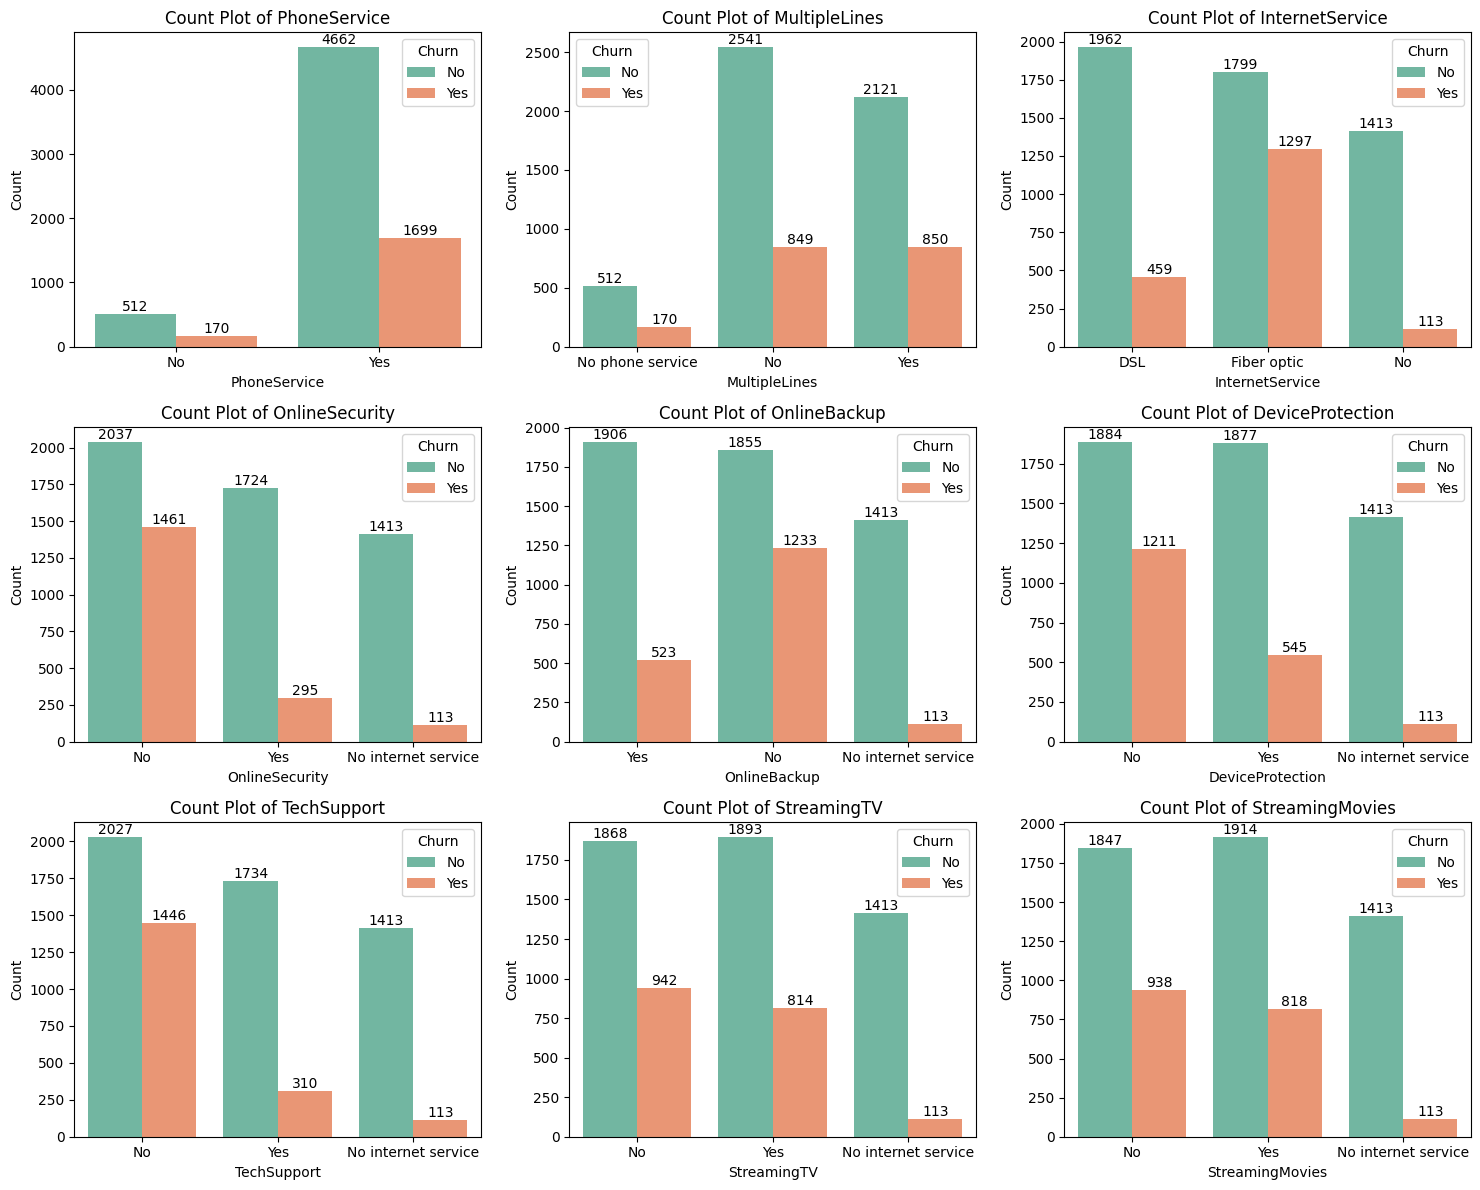

In [290]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies']
# no. of cols for the subplot grid (you can change this )
n_cols = 3
n_rows = (len(columns) + n_cols -1) // n_cols #Calculate the no. of rows needed.

# Create  subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))

#Flattens the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i ,col in enumerate (columns):
    sns.countplot(x= col,data = df,ax=axes[i],hue = "Churn",palette="Set2")
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].bar_label(axes[i].containers[0])
    axes[i].bar_label(axes[i].containers[1])


# Remove empty subplots
for j in range(i +1 ,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
    

##### The majority of customers who do not churn tend to have services like PhoneService, InternetService(particularly DSL), and onlineSecurity enabled. For services like OnlineBackup, Techsupport, and StreamingTV,churn rates are notcably higher when these services are not used or are unavailable. 

#### It’s clear that customers lacking value-added services like OnlineSecurity, TechSupport, and OnlineBackup have much higher churn compared to those who subscribed. Fiber optic users also show a noticeably higher churn rate versus DSL. Overall, availability and use of support/entertainment services strongly reduce churn, while customers without them are more likely to leave.

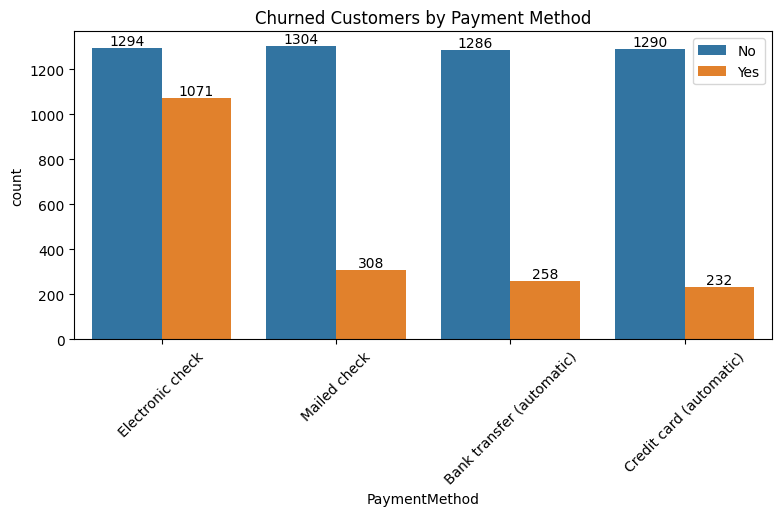

In [323]:
plt.figure(figsize=(9,4))

ax =sns.countplot(x= 'PaymentMethod',data = df,hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation= 45 )
plt.title("Churned Customers by Payment Method")
plt.legend(loc = 'best')
plt.show()

#### Customer is likely to churn when he/she is using Electronic Check as a Payment Method